## Summary

This project assigns U.S. senators to clusters of political parties based on their votings.
The expectation is of course that most senators are voting with their party.
However the goal here is to find patterns that go beyond party lines. 
For example groups of more moderates and more radicals senators are identified here.
The data used here is based on information given by the
<a href="https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=114&session=2&vote=00128">United State Senate</a>.

## Import packages



In [188]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans


## Import data


In [189]:
senate_votes=pd.read_csv("114_congress.csv", header=0, sep=",")

## Explore & clean the data

In [190]:
senate_votes.shape

(100, 18)

In [191]:
senate_votes.columns

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')

In [192]:
senate_votes.index

RangeIndex(start=0, stop=100, step=1)

In [193]:
senate_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
name     100 non-null object
party    100 non-null object
state    100 non-null object
00001    100 non-null float64
00004    100 non-null float64
00005    100 non-null float64
00006    100 non-null float64
00007    100 non-null float64
00008    100 non-null float64
00009    100 non-null float64
00010    100 non-null float64
00020    100 non-null float64
00026    100 non-null float64
00032    100 non-null float64
00038    100 non-null float64
00039    100 non-null float64
00044    100 non-null float64
00047    100 non-null float64
dtypes: float64(15), object(3)
memory usage: 14.1+ KB


In [194]:
senate_votes.dtypes

name      object
party     object
state     object
00001    float64
00004    float64
00005    float64
00006    float64
00007    float64
00008    float64
00009    float64
00010    float64
00020    float64
00026    float64
00032    float64
00038    float64
00039    float64
00044    float64
00047    float64
dtype: object

In [195]:
senate_votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [196]:
senate_votes.tail()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
99,Wyden,D,OR,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [197]:
senate_votes.isnull().sum()

name     0
party    0
state    0
00001    0
00004    0
00005    0
00006    0
00007    0
00008    0
00009    0
00010    0
00020    0
00026    0
00032    0
00038    0
00039    0
00044    0
00047    0
dtype: int64

In [198]:
# non standard null values 
null_values_questionmark = {}

for col in list(['name', 'party', 'state']):
    sum_null_values = senate_votes[col].str.match("\?").sum()
    null_values_questionmark[col] = sum_null_values

print(null_values_questionmark)

{'name': 0, 'party': 0, 'state': 0}


In [199]:
senate_votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [200]:
votes_mean = senate_votes.mean()
print(votes_mean.shape)
print(type(votes_mean))
votes_mean

(15,)
<class 'pandas.core.series.Series'>


00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

If the mean is greater than 0.5 more senators voted in favor of the bill than not.

In [201]:
passed_or_not = pd.DataFrame(columns=["Mean", "Passed?"])

for b, i in enumerate(votes_mean):
        passed_or_not.loc[b,"Mean"] = i
        if i > 0.5:
            passed_or_not.loc[b,"Passed?"]= "Bill passed"
        else:
            passed_or_not.loc[b,"Passed?"]= "Bill declined"
        
print(passed_or_not)
print(passed_or_not.groupby('Passed?')['Passed?'].count())

     Mean        Passed?
0   0.325  Bill declined
1   0.575    Bill passed
2   0.535    Bill passed
3   0.945    Bill passed
4   0.545    Bill passed
5   0.415  Bill declined
6   0.545    Bill passed
7   0.985    Bill passed
8   0.525    Bill passed
9   0.545    Bill passed
10   0.41  Bill declined
11   0.48  Bill declined
12   0.51    Bill passed
13   0.46  Bill declined
14   0.37  Bill declined
Passed?
Bill declined    6
Bill passed      9
Name: Passed?, dtype: int64


Sum of positive votes for every state and senator with party affiliation.

In [202]:
zz = senate_votes.sum(axis=1)
zz = pd.DataFrame(zz)
senate_votes_2 = senate_votes.copy()
sum_votes_state_1 = senate_votes_2.merge(zz, left_index=True, right_index=True) 
sum_votes_state_1 = sum_votes_state_1.rename(columns={0:"sum_positives"})
sum_votes_state_1['sum_positives'] = sum_votes_state_1['sum_positives'].astype("int")
sum_votes_state_1['sum_negatives'] = 15  - sum_votes_state_1['sum_positives']
sum_votes_state_2 = sum_votes_state_1.iloc[:,[0,1,2,-2,-1]]

sum_votes_state_2.head()

,name,party,state,sum_positives,sum_negatives
0,Alexander,R,TN,7,8
1,Ayotte,R,NH,8,7
2,Baldwin,D,WI,8,7
3,Barrasso,R,WY,9,6
4,Bennet,D,CO,5,10


### Modeling the senate votes data 

####  Determining closeness in voting decisions on ground of eucledian distances

In [203]:
senate_votes.iloc[:5, :3]

,name,party,state
0,Alexander,R,TN
1,Ayotte,R,NH
2,Baldwin,D,WI
3,Barrasso,R,WY
4,Bennet,D,CO


In [204]:
# Distance between votes of senator Baldwin, democrate of WI and senator Barrasso, republican of WY.
euclidean_distances(senate_votes.iloc[2,3:].values.reshape(1,-1), senate_votes.iloc[3,3:].values.reshape(1,-1))

array([[ 3.60555128]])

In [205]:
# Distance between votes of senator Alexander, republican of TN and senator Barrasso, republican of WY.
# The distance is lower, this is correspondent with party membership 
euclidean_distances(senate_votes.iloc[0,3:].values.reshape(1,-1), senate_votes.iloc[3,3:].values.reshape(1,-1))

array([[ 1.41421356]])

In [206]:
# Distance between votes of senator Ayotte, republican of NH and senator Barrasso, republican of WY.
# The distance is lower than with Baldwin, but higher than with Alexander despite same party membership 
euclidean_distances(senate_votes.iloc[1,3:].values.reshape(1,-1), senate_votes.iloc[3,3:].values.reshape(1,-1))

array([[ 2.23606798]])

### K-Means clustering with sklearn

<p>
K-Means clusters are an unsupervised learning strategy. There are no label or target variable given, 
which makes a prediction right or wrong. Instead clusters are determined based on the Euclidean distance. 
The number of clusters given beforehand is based here on the real world assumption that senators normally vote with their parties, which are two: Democrats and Republicans.
</p>



In [207]:
K_means_model_1 = KMeans(n_clusters=2, random_state=1)
K_means_model_1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [208]:
senate_votes_cols = senate_votes.iloc[:,3:]

distances_1 = K_means_model_1.fit_transform(senate_votes_cols)
# This gives the distance of the votes by each senator from cluster 1 or 2
# The distance of Alexander from cluster 1 is 3.12141628, and from cluster 2 is 1.3134775
# Jumping to conclusions: cluster 2 is republican.
distances_1[:5]

array([[ 3.12141628,  1.3134775 ],
       [ 2.6146248 ,  2.05339992],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 1.43833966,  2.96866004]])

In [209]:
labels_1 = K_means_model_1.labels_
labels_1[:5]

# labels are telling whether or not the observation belongs to cluster 1 (0) or 2 (1).

array([1, 1, 0, 1, 0])

In [210]:
pd.crosstab(labels_1, senate_votes['party'],  rownames=['Cluster'])

party,D,I,R
Cluster,,,
0,41,2,0
1,3,0,54


Cluster 1 (here 0): democrats; cluster 2 (here 1): republicans.

In [211]:
senate_votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

Interestingly all Republicans were assigned to cluster 1, but 3 Democrats also. 
This could mean that there 3 conservative Democrats.
Also Independents seems to vote with the Democrats.

In [212]:
independents_1=senate_votes[(labels_1==0) & (senate_votes['party']=='I')]
independents_1

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [213]:
independents_2=senate_votes[(senate_votes['party']=='I')]
independents_2

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


All independents voted with the democrats 0 mostly.

In [214]:
democrat_renegades_1 = senate_votes[(labels_1==1) & (senate_votes['party']=="D")]
democrat_renegades_1

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [215]:
democrats_all = senate_votes[(senate_votes['party']=="D")]
len(democrats_all)

44

Three democrats out 44 are assigned to the republican cluster.

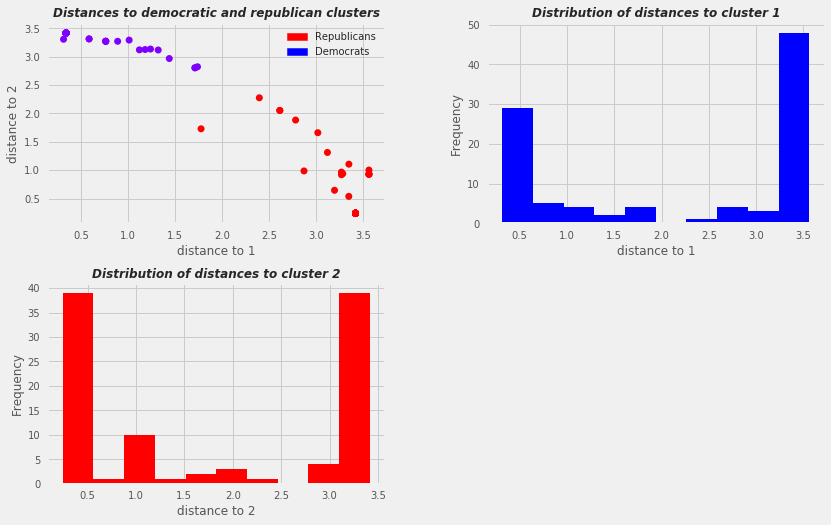

In [216]:
# distances_1[:,0]
# Cluster 1: democrats; cluster 2: republicans.

plt.style.available

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(18)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.3)


ax1 = plt.subplot(221)
ax1.scatter(x=distances_1[:,0], y=distances_1[:,1], c=labels_1, linewidths=0,cmap='rainbow')
ax1.set_title("Distances to democratic and republican clusters", fontsize=12,fontstyle='italic', fontweight='bold')
blue_patch = mpatches.Patch(color='blue', label='Democrats')
red_patch = mpatches.Patch(color='red', label='Republicans')
ax1.legend(handles=[red_patch, blue_patch])
ax1.set_xlabel("distance to 1", fontsize=12)
ax1.set_ylabel("distance to 2", fontsize=12)

ax2 = plt.subplot(222)
ax2.hist(x=distances_1[:,0], color="blue")
ax2.set_title("Distribution of distances to cluster 1", fontsize=12,fontstyle='italic', fontweight='bold' )
ax2.set_xlabel("distance to 1", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)


ax3 = plt.subplot(223)
ax3.hist(x=distances_1[:,1], color="red")
ax3.set_title("Distribution of distances to cluster 2", fontsize=12,fontstyle='italic', fontweight='bold' )
ax3.set_xlabel("distance to 2", fontsize=12)
ax3.set_ylabel("Frequency", fontsize=12)




plt.show()

The points in the corners of the scatterplot have the highest distance to one of the clusters. 
The frequencies of those are also high as the histograms show. However distances within 0 to 0.5 indicating
voting descions in the center are also highly represented. The first group is more stringent, rigorous, radical.
The latter group is more moderate or flexibel.

In [217]:
# cubing the distances, becaus cubing as non-linear function makes differences between distances greater
# This way differences are more recognizable
voting_strictly_with_party = (distances_1**3).sum(axis=1)
senate_votes["voting_strictly"] = voting_strictly_with_party
senate_votes_3 = senate_votes.sort_values(by="voting_strictly", ascending=False)
senate_votes_3.reset_index(inplace=True)


In [218]:
senate_votes_3.loc[:10,['name', 'party', 'state']]

,name,party,state
0,Wicker,R,MS
1,Lankford,R,OK
2,Paul,R,KY
3,Sasse,R,NE
4,Cruz,R,TX
5,Johnson,R,WI
6,Isakson,R,GA
7,Murkowski,R,AK
8,Moran,R,KS
9,Enzi,R,WY


Senator Wicker is according to this k-means analysis the most rigorous voter.<br>
Is this supported by qualitative information?
According to <a href="https://en.wikipedia.org/wiki/Roger_Wicker">Wikipedia, Senator Wicker</a>
<ul>
<li>was the only U.S. Senator to vote against an amendment declaring that climate change is real. </li> 
<li>Wicker's support for pro-gun legislation and gun rights has earned him an "A+".rating from the National Rifle Association (NRA).</li>
</ul>
<p>
It seems the qualitative information supports his strict voting behavior. (Without of course making a judgement on this.)
</p>

In [219]:
senate_votes_3.loc[len(senate_votes_3)-10:len(senate_votes_3)-1,['name', 'party', 'state']]

,name,party,state
90,Bennet,D,CO
91,Manchin,D,WV
92,Donnelly,D,IN
93,McCaskill,D,MO
94,Tester,D,MT
95,Ayotte,R,NH
96,Collins,R,ME
97,Heitkamp,D,ND
98,Rubio,R,FL
99,Reid,D,NV


Of the 10 most flexible senators 8 are democrates and 3 republicans. Are those from similar region?